In [1]:
import numpy as np
from ipywidgets import widgets
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0}) # garbage collection should close plots when finished so safe to supress this warning
# %matplotlib widget

In [2]:
class FrequencyPlannerADC:

    def __init__(self, fs_rf=4092, fc=1175.42, fs_bw=10.23, pll_ref=409.2, il_factor=8):
        self.fs_rf = fs_rf
        self.fc = fc
        self.fs_bw = fs_bw
        self.pll_ref = pll_ref
        self.il_factor = il_factor
        
        self.f = np.linspace(-0.5,0.5,100)
        
    @property
    def signal_f(self):
        fs_rf = self.fs_rf
        fs_bw = self.fs_bw
        fc = self.fc
        f = self.f
        
        return [fs_rf - ((fc+fs_bw*i) % fs_rf) if ((fc+fs_bw*i) % fs_rf) >= fs_rf/2 else ((fc+fs_bw*i) % fs_rf) for i in f]

    @property
    def interf_f(self):
        fc = self.fc
        fs_bw = self.fs_bw
        f = self.f
        return [fc+(fs_bw*i) for i in f]
    
    @property    
    def hd(self):
        fs_rf = self.fs_rf
        interf_f = self.interf_f
        
        hd2 = [fs_rf - (2*i % fs_rf) if 2*i % fs_rf >= fs_rf/2 else (2*i % fs_rf) for i in interf_f]
        hd3 = [fs_rf - (3*i % fs_rf) if 3*i % fs_rf >= fs_rf/2 else (3*i % fs_rf) for i in interf_f]
        hd4 = [fs_rf - (4*i % fs_rf) if 4*i % fs_rf >= fs_rf/2 else (4*i % fs_rf) for i in interf_f]
        hd5 = [fs_rf - (5*i % fs_rf) if 5*i % fs_rf >= fs_rf/2 else (5*i % fs_rf) for i in interf_f]
        
        return hd2, hd3, hd4, hd5
    
    @property
    def il(self):
        fs_rf = self.fs_rf
        signal_f = self.signal_f
        interf_f = self.interf_f
        il_factor = self.il_factor
        
        if il_factor > 1:
            il1 = [abs(fs_rf/2 - i) for i in signal_f]
        else:
            il1 = 0

        if il_factor > 2:
            il2 = [abs(fs_rf/4 - i) for i in signal_f]
            il3 = [abs(fs_rf/4 + i) if ((fs_rf/4 + i) < fs_rf/2) else abs(fs_rf/4*3-i) for i in signal_f]
        else:
            il2 = il3 = 0

        if il_factor > 4:
            il4 = [abs(fs_rf/8 - i) for i in signal_f]
            il5 = [abs(fs_rf/8 + i) if ((fs_rf/8 + i) < fs_rf/2) else abs(fs_rf/8*7-i) for i in signal_f]
            il6 = [abs(fs_rf/8*3-i) for i in signal_f]
            il7 = [abs(fs_rf/8*3+i) if ((fs_rf/8*3+i) < fs_rf/2) else abs(fs_rf/8*5-i) for i in signal_f]
        else:
            il4 = il5 = il6 = il7 = 0

        return il1, il2, il3, il4, il5, il6, il7
    
    @property
    def fs_hd(self):
        fs_rf = self.fs_rf
        il_factor = self.il_factor
        hd2 = self.hd[0]
        hd3 = self.hd[1]

        if il_factor > 1:
            fs2_m_hd2 = [abs(fs_rf/2-i) for i in hd2]
            fs2_m_hd3 = [fs_rf/2-i for i in hd3]
        else:
            fs2_m_hd2 = fs2_m_hd3 = 0

        if il_factor > 2:
            fs4_m_hd2 = [abs(fs_rf/4-i) for i in hd2]
            fs4_p_hd2 = [abs(fs_rf/4+i) if (fs_rf/4+i < fs_rf/2) else abs(fs_rf/4*3-i) for i in hd2]
            fs4_m_hd3 = [abs(fs_rf/4-i) for i in hd3]
            fs4_p_hd3 = [abs(fs_rf/4+i) if (fs_rf/4+i < fs_rf/2) else abs(fs_rf/4*3-i) for i in hd3]    
        else:
            fs4_m_hd2 = fs4_p_hd2 = fs4_m_hd3 = fs4_p_hd3 = 0

        if il_factor > 4:
            fs8_m_hd2 = [abs(fs_rf/8-i) for i in hd2]
            fs8_p_hd2 = [abs(fs_rf/8+i) if (fs_rf/8+i < fs_rf/2) else abs(fs_rf/8*7-i) for i in hd2]
            fs8_m_hd3 = [abs(fs_rf/8-i) for i in hd3]
            fs8_p_hd3 = [abs(fs_rf/8+i) if (fs_rf/8+i < fs_rf/2) else abs(fs_rf/8*7-i) for i in hd3]
        else:
            fs8_m_hd2 = fs8_p_hd2 = fs8_m_hd3 = fs8_p_hd3 = 0

        return fs2_m_hd2, fs2_m_hd3, fs4_m_hd2, fs4_p_hd2, fs4_m_hd3, fs4_p_hd3, fs8_m_hd2, fs8_p_hd2, fs8_m_hd3, fs8_p_hd3

    @property
    def clk_mix_prod(self):
        fs_rf = self.fs_rf
        fc = self.fc
        fs_bw = self.fs_bw
        pll_ref = self.pll_ref
        f = self.f
        
        clk_mix_prod_up = [fs_rf - ((fc+fs_bw*i+pll_ref) % fs_rf) if ((fc+fs_bw*i+pll_ref) % fs_rf) >= fs_rf/2 else ((fc+fs_bw*i+pll_ref) % fs_rf) for i in f]
        clk_mix_prod_down = [fs_rf - ((fc+fs_bw*i-pll_ref) % fs_rf) if ((fc+fs_bw*i-pll_ref) % fs_rf) >= fs_rf/2 else ((fc+fs_bw*i-pll_ref) % fs_rf) for i in f]
        
        return clk_mix_prod_up, clk_mix_prod_down
    
    @property
    def calibration_mode(self):
        fs_rf = self.fs_rf
        fc = self.fc
        
        if ((fs_rf/2*0.7 < fc) and (fc < fs_rf/2*1.3)) or ((fs_rf/2*3-0.3*fs_rf/2 < fc) and (fc < fs_rf/2*3+0.3*fs_rf/2)) or ((fs_rf/2*5-0.3*fs_rf/2 < fc) and (fc < fs_rf/2*5+0.3*fs_rf/2)) or ((fs_rf/2*7-0.3*fs_rf/2 < fc) and (fc < fs_rf/2*7+0.3*rf_fs/2)) or ((fs_rf/2*9+0.3*fs_rf/2 < fc) and (fc < fs_rf/2*9+0.3*fs_rf/2)):
            return "Calibration Mode: Mode 1"
        else:
            return "Calibration Mode: Mode 2"
        
    @property
    def pparams(self):
        p_rx = {'label':'Rx Band', 'marker':'D', 'color':'tab:blue', 'y':6}
        p_nyq = {'label':'Nyquist', 'marker':'D', 'color':'tab:gray', 'y':6}
        p_hd2 = {'label':'HD2', 'marker':'D', 'color':'tab:orange', 'y':2}
        p_hd3 = {'label':'HD3', 'marker':'D', 'color':'tab:orange', 'y':3}
        p_hd4 = {'label':'HD4', 'marker':'D', 'color':'tab:orange', 'y':4}
        p_hd5 = {'label':'HD5', 'marker':'D', 'color':'tab:orange', 'y':5}
        
        return p_rx, p_nyq, p_hd2, p_hd3, p_hd4, p_hd5

In [11]:
class FrequencyPlannerPlot:
    
    def __init__(self, fig, ax, x, loc):
        self.fig = fig
        self.ax = ax
        self.loc = loc
        
        self.ax.grid(True)
        self.ax.set_xlabel('Frequency (MHz)', fontsize=10)
        self.ax.set_ylabel('Harmonic No.', fontsize=10)
        self.ax.set_xlim([0, 4096/2 + 4096*0.01])
        self.ax.set_ylim([0, 7])
        
        self.rx_line_a, = self.ax.plot([0,0], np.repeat(x.pparams[0]['y'],2), label=x.pparams[0]['label'], marker=x.pparams[0]['marker'], color=x.pparams[0]['color'])
        self.rx_line_b = self.ax.axvline(x=0, ymin=0, ymax=6/7, color=x.pparams[0]['color'])
        self.rx_line_c = self.ax.axvline(x=0, ymin=0, ymax=6/7, color=x.pparams[0]['color'])
    
        # Nyquist
        self.nyq_line_a, = ax.plot(0, x.pparams[1]['y'], marker=x.pparams[1]['marker'], color=x.pparams[1]['color'], label=x.pparams[1]['label'])
        self.nyq_line_b  = ax.axvline(x=0, ymin=0, ymax=6/7, color=x.pparams[1]['color'])
        
        self.ax.legend(bbox_to_anchor=(loc,1),fontsize=9, borderaxespad=0., loc=2)
        self.fig.tight_layout()
    
    def update_plot(self, x):
        
#         self.ax.set_xlim([0, x.fs_rf/2 + x.fs_rf*0.01])
        
        # Rx Band
        self.rx_line_a.set_xdata([min(x.signal_f), max(x.signal_f)])
        self.rx_line_b.set_xdata(min(x.signal_f))
        self.rx_line_c.set_xdata(max(x.signal_f))
        
        # Nyquist Band
        self.nyq_line_a.set_xdata(x.fs_rf/2)
        self.nyq_line_b.set_xdata(x.fs_rf/2)
        
        self.fig.canvas.draw()

/home/jng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


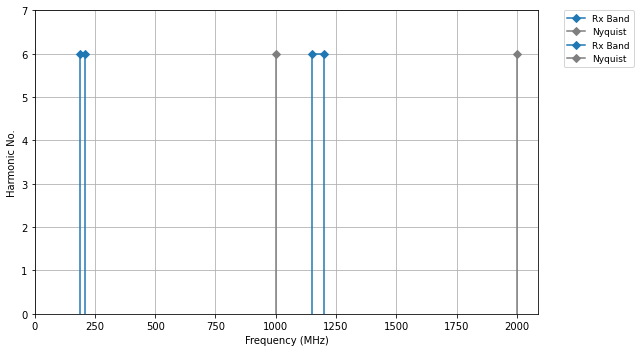

In [17]:
fig_adc = plt.figure(figsize=(9,5))
ax_adc0 = fig_adc.add_subplot(111)
ax_adc1 = fig_adc.add_subplot(111)

x0 = FrequencyPlannerADC(4000, 1175.42, 50.23, 409.2, 8)
x1 = FrequencyPlannerADC(2000, 1800, 20, 409.2, 8)
y0 = FrequencyPlannerPlot(fig_adc, ax_adc0, x0, loc=1.05)
y1 = FrequencyPlannerPlot(fig_adc, ax_adc1, x1, loc=1.05)
y0.update_plot(x0)
y1.update_plot(x1)
plt.show()